<div style="background-color:maroon; padding:10px;">
</div>

# AM 205 - Advanced Scientific Computing: Numerical Methods
<div style="background-color:maroon; padding:10px;">
</div>

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Prof. Nick Trefethen<br/>
**Author**: Elaine Swanson

### 1. **p10_lstsq2.m** - least-squares by three methods
####  this code compares three different methods for solving the least-squares problem: using backslash operator (QR factorization), explicit QR factorization, and the normal equations. The goal is to fit a model to some data, using a matrix of trigonometric terms. The code ignores the Chebfun portion, which is a MATLAB tool for dealing with functions in a continuous domain. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import qr
from sympy import symbols, sin, cos, pi, Piecewise, Matrix, solve
import sympy as sp

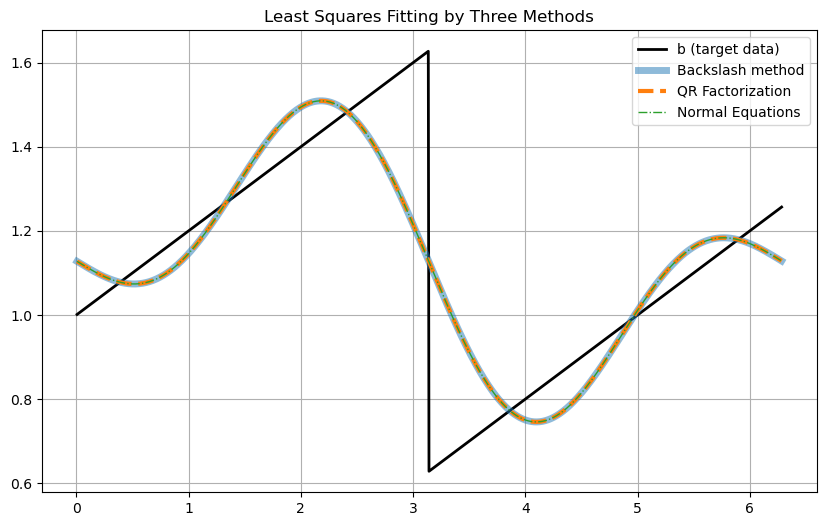

Norm of residuals:
Backslash method: 4.409169015107598
QR Factorization method: 4.409169015107598
Normal Equations method: 4.409169015107598


In [3]:
## discrete time t and target vector b
t = 2 * np.pi * np.arange(1, 1001) / 1000
b = t / 5 + (t < np.pi)

## plot original data
plt.figure(figsize=(10, 6))
plt.plot(t, b, label="b (target data)", color="black", linewidth=2)
plt.title("Least Squares Fitting by Three Methods")
plt.grid(True)

## create matrix A with trigonometric terms
A = np.column_stack([np.cos(0 * t), np.sin(t), np.cos(t), np.sin(2 * t), np.cos(2 * t)])

## method 1: Backslash method (equivalent to using np.linalg.lstsq)
x_backslash, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
plt.plot(t, A @ x_backslash, label="Backslash method", linestyle='-', linewidth=5, alpha=0.5)

## method 2: Explicit QR factorization
Q, R = qr(A, mode='economic')
x_qr = np.linalg.solve(R, Q.T @ b)
plt.plot(t, A @ x_qr, label="QR Factorization", linestyle='--', linewidth=3)

## method 3: Normal equations
x_normal = np.linalg.solve(A.T @ A, A.T @ b)
plt.plot(t, A @ x_normal, label="Normal Equations", linestyle='-.', linewidth=1)

plt.legend()
plt.show()

## norm of residuals for each method
print("Norm of residuals:")
print("Backslash method:", np.linalg.norm(A @ x_backslash - b))
print("QR Factorization method:", np.linalg.norm(A @ x_qr - b))
print("Normal Equations method:", np.linalg.norm(A @ x_normal - b))
